In [146]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [147]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-sales-data/car_prices.csv


In [148]:
# Load each annex file
df = pd.read_csv("/kaggle/input/vehicle-sales-data/car_prices.csv")
print(df.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

In [149]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [150]:
df['model'].value_counts()

model
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: count, Length: 973, dtype: int64

In [151]:
df_clean = df.dropna(subset=['year', 'color', 'odometer'])

# Filter: white cars from 2015
white_2015_cars = df_clean[(df_clean['color'] == 'white') & (df_clean['year'] == 2015)]

# Sort by odometer in descending order
top5_white_2015 = white_2015_cars.sort_values(by='odometer', ascending=False).head(5)

# Display relevant info
print(top5_white_2015[['year', 'make', 'model', 'odometer', 'color', 'sellingprice']])

        year       make             model  odometer  color  sellingprice
500906  2015       Ford  F-250 Super Duty   47463.0  white       32700.0
462908  2015  Chevrolet  Silverado 2500HD   45526.0  white       43500.0
110793  2015  Chevrolet  Silverado 2500HD   44174.0  white       40900.0
549860  2015       Ford  F-250 Super Duty   43813.0  white       21900.0
553804  2015       Ford  F-250 Super Duty   43141.0  white       45000.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


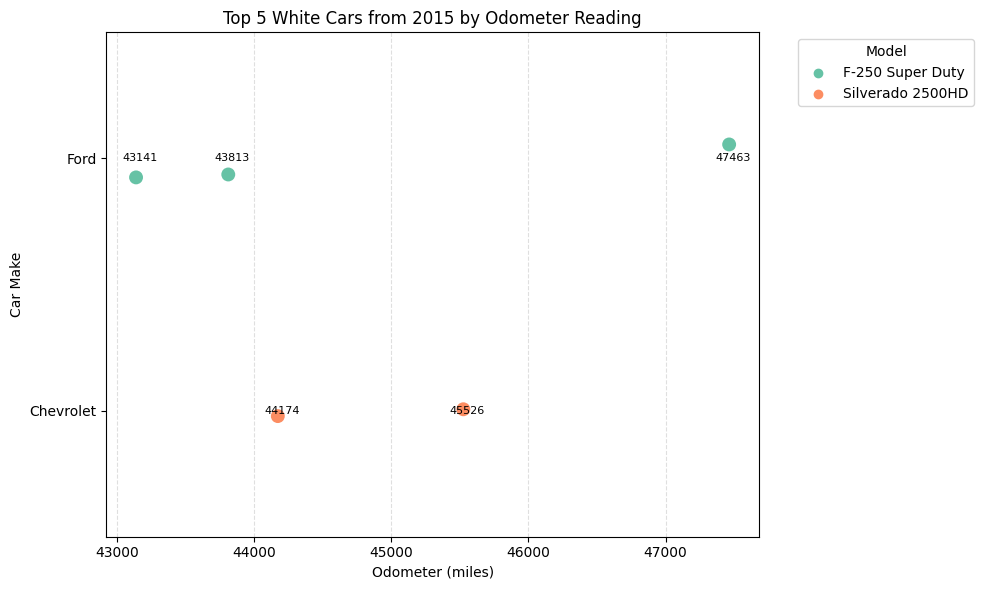

In [152]:
# Create strip plot
plt.figure(figsize=(10, 6))
ax = sns.stripplot(
    data=top5_white_2015,
    x='odometer',
    y='make',
    hue='model',
    palette='Set2',
    size=10,
    dodge=False
)

# Add text labels
for i, row in top5_white_2015.iterrows():
    plt.text(
        row['odometer'] -100,  # x-position
        row['make'],            # y-position
        str(int(row['odometer'])),  # text
        fontsize=8,
        va='center'
    )

plt.title('Top 5 White Cars from 2015 by Odometer Reading')
plt.xlabel('Odometer (miles)')
plt.ylabel('Car Make')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [153]:
# Step 1: Count number of sales per seller
top_sellers = df['seller'].value_counts().head(10).index

# Step 2: Filter dataset to include only those top sellers
filtered_df = df[df['seller'].isin(top_sellers)]

# Step 3: Group by seller and model, then count
seller_model_counts = (
    filtered_df.groupby(['seller', 'model'])
    .size()
    .reset_index(name='count')
    .sort_values(['seller', 'count'], ascending=[True, False])
)

# Step 4: For each seller, get the most sold model
top_models_per_seller = seller_model_counts.groupby('seller').head(1)

print(top_models_per_seller)

                                     seller             model  count
37                         avis corporation             Cruze    983
359          enterprise veh exchange/rental  Town and Country    430
452           ford motor credit company llc            Fusion   3722
617   ge fleet services for itself/servicer     Grand Caravan    630
742                      nissan infiniti lt           G Sedan   6547
763                      nissan-infiniti lt            Altima   9296
983                      santander consumer            Impala    511
1376                       tdaf remarketing             F-150    388
1738                  the hertz corporation            Altima   1029
2077            wells fargo dealer services             F-150    194


/tmp/ipykernel_31/4014537965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_models_per_seller['label'] = top_models_per_seller['seller'] + ' (' + top_models_per_seller['model'] + ')'


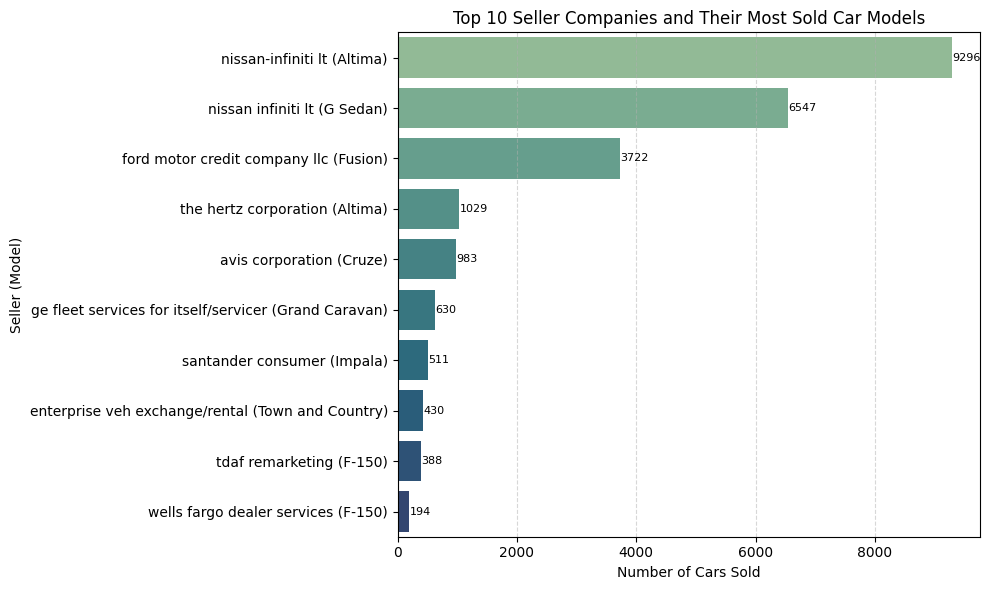

In [154]:
# Create a new label combining seller and model for clarity
top_models_per_seller['label'] = top_models_per_seller['seller'] + ' (' + top_models_per_seller['model'] + ')'

# Sort by count for better visual order
top_models_per_seller = top_models_per_seller.sort_values(by='count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_models_per_seller,
    x='count',
    y='label',
    palette='crest'
)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',  # Label with the width value (car count)
                (p.get_width() + 5, p.get_y() + p.get_height() / 2),  # Positioning the text
                va='center',  # Vertical alignment
                ha='left',    # Horizontal alignment
                fontsize=8)

plt.title('Top 10 Seller Companies and Their Most Sold Car Models')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Seller (Model)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [155]:
df['interior'].unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

In [156]:
# Top 10 most common colors and interiors
# Replace '—' with NaN
df['color'] = df['color'].replace('—', np.nan)
df['interior'] = df['interior'].replace('—', np.nan)

# Optional: Drop rows where color or interior is missing
df_cleaned = df.dropna(subset=['color', 'interior'])

top_colors = df_cleaned['color'].value_counts().head(10)
top_interiors = df_cleaned['interior'].value_counts().head(10)

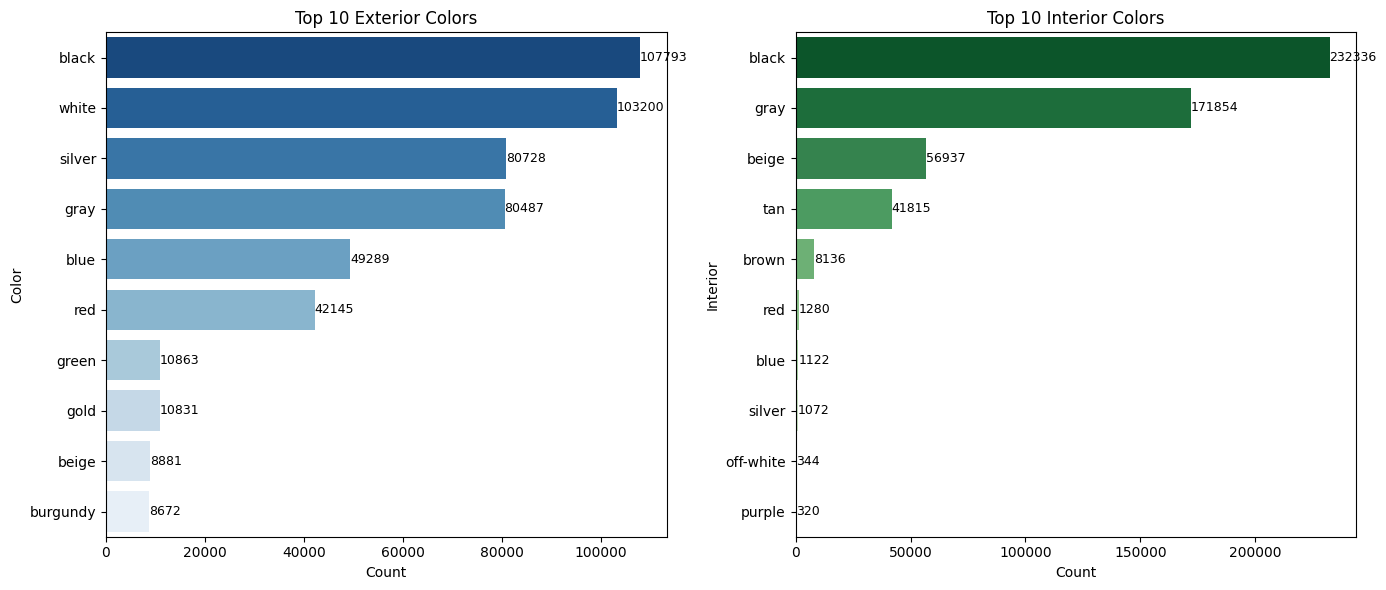

In [157]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Color bar chart
color_plot = sns.barplot(x=top_colors.values, y=top_colors.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Top 10 Exterior Colors')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Color')

# Add labels to color bars
for i, v in enumerate(top_colors.values):
    axes[0].text(v + 5, i, str(v), va='center', fontsize=9)

# Interior bar chart
interior_plot = sns.barplot(x=top_interiors.values, y=top_interiors.index, palette='Greens_r', ax=axes[1])
axes[1].set_title('Top 10 Interior Colors')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Interior')

# Add labels to interior bars
for i, v in enumerate(top_interiors.values):
    axes[1].text(v + 5, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [158]:
# Ensure consistent lowercase and replace non-color placeholders
df['color'] = df['color'].astype(str).str.lower().replace(['—', 'nan'], np.nan)
df['interior'] = df['interior'].astype(str).str.lower().replace(['—', 'nan'], np.nan)

# Drop rows with missing or invalid values
df_clean = df.dropna(subset=['color', 'interior'])
df_clean = df_clean[df_clean['color'].str.isalpha() & df_clean['interior'].str.isalpha()]

# Crosstab for valid color/interior combinations
combo_matrix = pd.crosstab(df_clean['color'], df_clean['interior'])
combo_matrix

interior,beige,black,blue,brown,burgundy,gold,gray,green,orange,purple,red,silver,tan,white,yellow
color,,,,,,,,,,,,,,,
beige,2591,1862,5,276,1,14,1492,2,2,1,4,5,2623,3,0
black,9770,61563,105,2107,47,42,26114,39,34,61,380,134,7215,37,3
blue,5478,18548,396,599,5,26,20082,13,6,23,23,119,3918,24,0
brown,1631,1980,3,604,7,9,922,2,8,3,3,9,1302,3,0
burgundy,1759,2821,1,152,16,11,2410,4,2,20,6,12,1453,5,0
charcoal,41,265,0,9,1,0,124,0,1,0,2,0,27,0,0
gold,3925,1842,5,339,3,95,1501,1,1,1,7,12,3098,0,1
gray,4762,41447,107,734,14,6,30154,35,14,43,172,173,2761,28,0
green,2329,2417,17,285,0,7,3769,49,1,2,0,12,1969,6,0


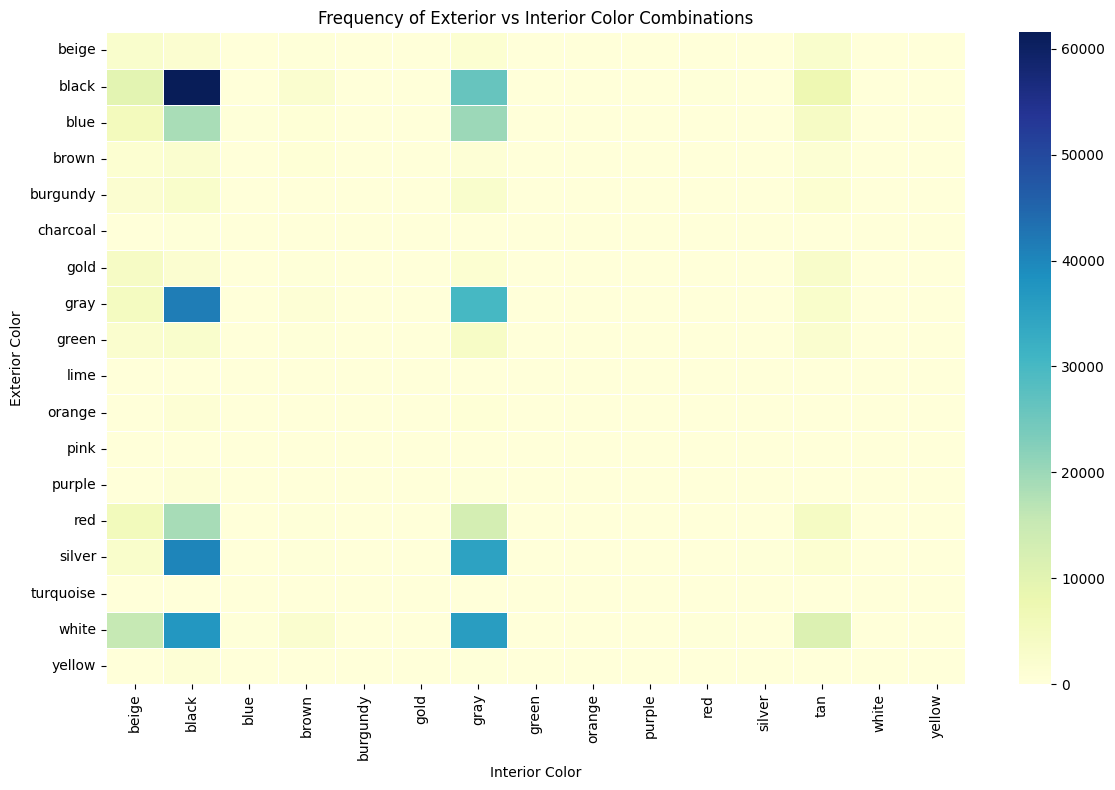

In [159]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combo_matrix, cmap='YlGnBu', linewidths=0.5, annot=False)
plt.title('Frequency of Exterior vs Interior Color Combinations')
plt.xlabel('Interior Color')
plt.ylabel('Exterior Color')
plt.tight_layout()
plt.show()

In [160]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [161]:
top_bmw_models = df[df['make']=='BMW']['model'].value_counts().head(15)
top_bmw_models

model
3 Series                 8204
5 Series                 4172
X5                       2462
X3                       1250
7 Series                 1189
6 Series                  676
1 Series                  405
X1                        331
M3                        297
4 Series                  293
Z4                        276
X6                        263
5 Series Gran Turismo     204
6 Series Gran Coupe       108
M5                        107
Name: count, dtype: int64

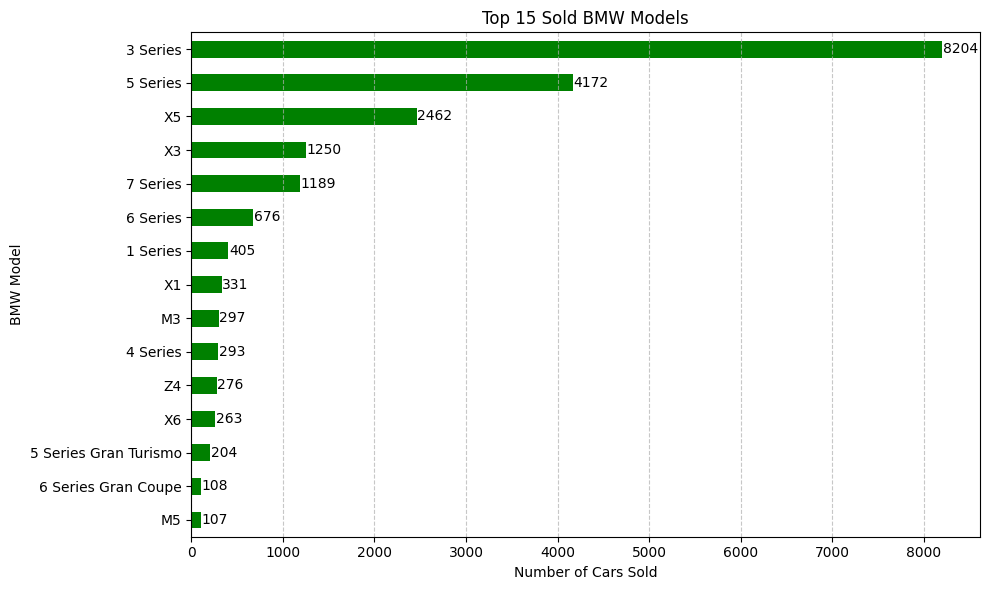

In [162]:
# Plot the top 15 BMW models
plt.figure(figsize=(10, 6))
top_bmw_models.sort_values().plot(kind='barh', color='green')

plt.title('Top 15 Sold BMW Models')
plt.xlabel('Number of Cars Sold')
plt.ylabel('BMW Model')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Add value labels
for index, value in enumerate(top_bmw_models.sort_values()):
    plt.text(value + 5, index, str(value), va='center')

plt.show()

In [163]:
df['transmission'].unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

In [164]:
df1 = df[df['transmission'].str.lower().isin(['automatic', 'manual'])]
df1

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [165]:
df1['transmission'].value_counts()

transmission
automatic    475915
manual        17544
Name: count, dtype: int64

In [166]:
top_manuals = df1[df1['transmission']=='manual'][['make', 'model']].value_counts().head(20)
top_manuals

make        model     
Jeep        Wrangler      1016
Ford        Mustang        858
Honda       Civic          778
MINI        Cooper         704
Volkswagen  Jetta          558
BMW         3 Series       459
Ford        Focus          409
Chevrolet   Camaro         381
Subaru      Impreza        330
Honda       Accord         321
Mazda       Mazda3         303
Ford        Ranger         272
Kia         Soul           251
Toyota      Corolla        236
Chevrolet   Corvette       198
Dodge       Challenger     196
Chevrolet   Cruze          190
Scion       tC             186
Nissan      Sentra         180
Ford        Fiesta         175
Name: count, dtype: int64

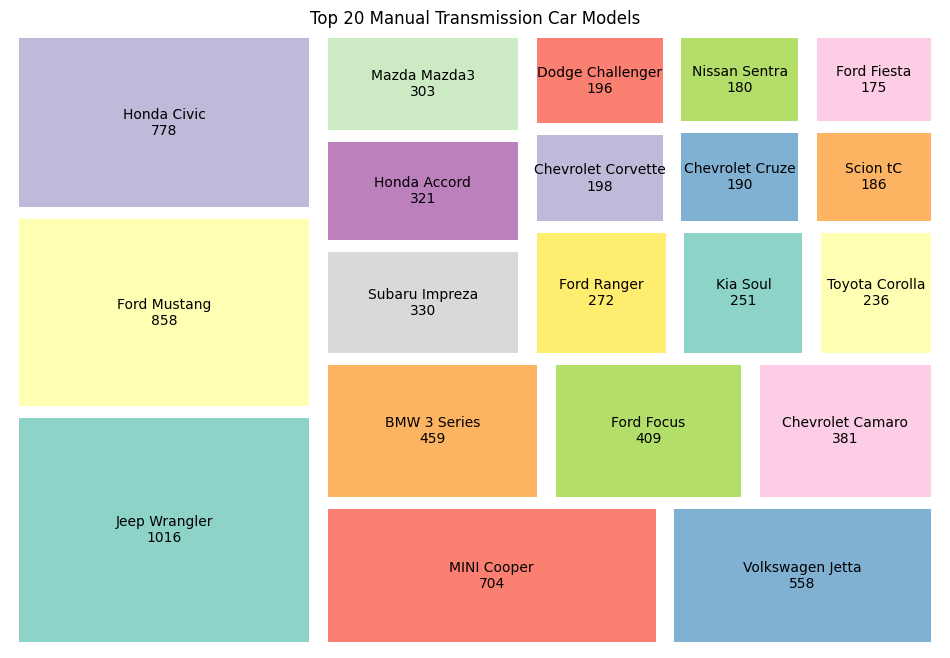

In [167]:
import squarify
labels = [f"{make} {model}\n{count}" for (make, model), count in top_manuals.items()]
sizes = top_manuals.values

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=plt.cm.Set3.colors, pad=True)
plt.title('Top 20 Manual Transmission Car Models')
plt.axis('off')
plt.show()

In [168]:
top_sold_year = df['year'].value_counts().head(15)

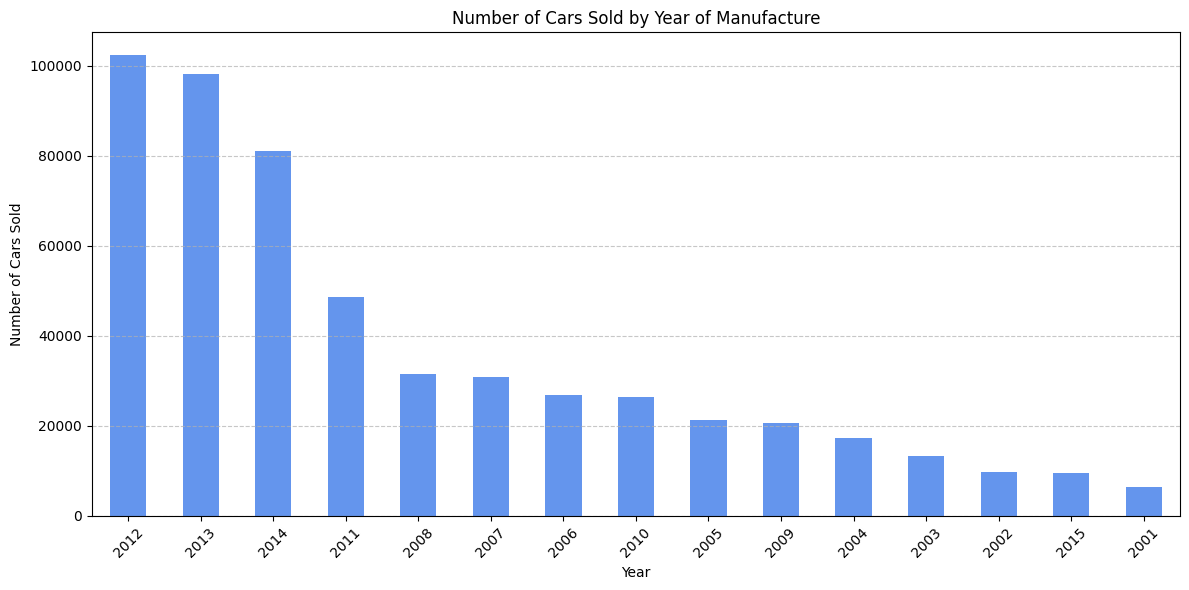

In [169]:
top_sold_year.plot(kind='bar', figsize=(12, 6), color='cornflowerblue')
plt.title('Number of Cars Sold by Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [170]:
df['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

In [171]:
df2 = df[df['state'].str.fullmatch(r'[a-z]{2}', na=False)]

In [172]:
df2['state'].value_counts()

state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12027
md    11158
wi     9851
mn     9429
az     8741
co     7775
wa     7416
ma     6729
ny     5699
in     4325
sc     4251
ne     4013
on     3442
pr     2725
la     2191
ms     1851
ut     1836
qc     1245
hi     1237
or     1155
ab      928
nm      171
ok       72
ns       61
al       26
Name: count, dtype: int64

In [173]:
popular_carmodels_states = df2[df['state']=='fl'][['make','model']].value_counts().head(10)
popular_carmodels_states

/tmp/ipykernel_31/166691212.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  popular_carmodels_states = df2[df['state']=='fl'][['make','model']].value_counts().head(10)


make     model        
Nissan   Altima           3518
Toyota   Camry            2867
         Corolla          2151
Hyundai  Sonata           1554
Dodge    Grand Caravan    1477
Ford     Fusion           1405
         Focus            1403
BMW      3 Series         1312
Ford     F-150            1242
Nissan   Maxima           1235
Name: count, dtype: int64

In [174]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [175]:
df['saledate'].unique()

array(['Tue Dec 16 2014 12:30:00 GMT-0800 (PST)',
       'Thu Jan 15 2015 04:30:00 GMT-0800 (PST)',
       'Thu Jan 29 2015 04:30:00 GMT-0800 (PST)', ...,
       'Tue Jul 07 2015 08:45:00 GMT-0700 (PDT)',
       'Thu Jul 02 2015 13:20:00 GMT-0700 (PDT)',
       'Wed Jul 08 2015 09:45:00 GMT-0700 (PDT)'], dtype=object)

In [177]:
# Replace string 'nan' and '...' with actual np.nan
df.replace(['nan', '...'], pd.NA, inplace=True)

# Now drop rows with any missing values
df.dropna(inplace=True)

In [187]:
columns_to_clean = ['trim', 'vin', 'odometer', 'seller', 'mmr', 'sellingprice', 'saledate']
df = df[~df[columns_to_clean].isin([...]).any(axis=1)]

In [190]:
df = df[df['state'].str.fullmatch(r'[a-z]{2}', na=False)]

In [192]:
# Keep only rows where Color is NOT an integer
df = df[~df['color'].apply(lambda x: isinstance(x, int) or (isinstance(x, float) and x.is_integer()))]


In [193]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [195]:
df.isna().value_counts()

year   make   model  trim   body   transmission  vin    state  condition  odometer  color  interior  seller  mmr    sellingprice  saledate
False  False  False  False  False  False         False  False  False      False     False  False     False   False  False         False       440393
Name: count, dtype: int64

In [196]:
df.to_csv('cleaned_carsales_data.csv', index=False)